In [107]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [108]:
# 항공 작업 경로 변환
os.chdir("../file_csv/hotel")
# os.chdir("../../file_csv/hotel")

In [109]:
df = pd.read_csv('hotel_EDA.csv')
df_2p = pd.read_csv('hotel_EDA_2p_2.csv')
df_4p = pd.read_csv('hotel_EDA_4p_2.csv')

In [110]:
# name 리스트 (중복 x)
name_sort = df_2p['name'].sort_values(ignore_index=True)
name_sort_list = [name_sort[i] for i in range(len(name_sort))]  # 이름 >> 리스트화
name_list_2p = list(dict.fromkeys(name_sort_list))  # 중복 제거

name_sort = df_4p['name'].sort_values(ignore_index=True)
name_sort_list = [name_sort[i] for i in range(len(name_sort))]  # 이름 >> 리스트화
name_list_4p = list(dict.fromkeys(name_sort_list))  # 중복 제거

In [111]:
df_ = pd.concat([df_2p, df_4p])
df_ = df_.sort_values(by=['date', 'name', 'person'], ascending=True).reset_index(drop=True)
df_

,date,name,price,person,level,review_count,review_group,score,city,city_details
0,2023-08-01,Premium 리벤시아 풀빌라&호텔,962500,2인,가족호텔,34.0,500 미만,4.2,제주시,한림읍
1,2023-08-01,Premium 리벤시아 풀빌라&호텔,962500,4인,가족호텔,34.0,500 미만,4.2,제주시,한림읍
2,2023-08-01,갤러리 호텔 비앤비,52000,2인,비지니스,261.0,500 미만,4.3,제주시,연동
3,2023-08-01,골드원 호텔&스위트,591800,2인,4성급,147.0,500 미만,4.8,서귀포시,서호동
4,2023-08-01,골드원 호텔&스위트,591800,4인,4성급,147.0,500 미만,4.8,서귀포시,서호동
...,...,...,...,...,...,...,...,...,...,...
25322,2023-10-31,화이트하우스 호텔,89500,2인,관광,275.0,500 미만,4.2,제주시,용담삼동
25323,2023-10-31,화이트하우스 호텔,89500,4인,관광,275.0,500 미만,4.2,제주시,용담삼동
25324,2023-10-31,훈데르트힐즈,449875,2인,가족호텔,9.0,500 미만,4.8,제주시,우도면
25325,2023-10-31,훈데르트힐즈,449875,4인,가족호텔,9.0,500 미만,4.8,제주시,우도면


In [112]:
def day(date):
    return int(date[8:10])
df_['day'] = df_['date'].apply(day)
df_2p['day'] = df_2p['date'].apply(day)
df_4p['day'] = df_4p['date'].apply(day)

def month(date):
    if date[5:7] == '08':
        return 'August'
    elif date[5:7] == '09':
        return 'September'
    elif date[5:7] == '10':
        return 'October'
df_['month'] = df_['date'].apply(month)
df_2p['month'] = df_2p['date'].apply(month)
df_4p['month'] = df_4p['date'].apply(month)

df_

,date,name,price,person,level,review_count,review_group,score,city,city_details,day,month
0,2023-08-01,Premium 리벤시아 풀빌라&호텔,962500,2인,가족호텔,34.0,500 미만,4.2,제주시,한림읍,1,August
1,2023-08-01,Premium 리벤시아 풀빌라&호텔,962500,4인,가족호텔,34.0,500 미만,4.2,제주시,한림읍,1,August
2,2023-08-01,갤러리 호텔 비앤비,52000,2인,비지니스,261.0,500 미만,4.3,제주시,연동,1,August
3,2023-08-01,골드원 호텔&스위트,591800,2인,4성급,147.0,500 미만,4.8,서귀포시,서호동,1,August
4,2023-08-01,골드원 호텔&스위트,591800,4인,4성급,147.0,500 미만,4.8,서귀포시,서호동,1,August
...,...,...,...,...,...,...,...,...,...,...,...,...
25322,2023-10-31,화이트하우스 호텔,89500,2인,관광,275.0,500 미만,4.2,제주시,용담삼동,31,October
25323,2023-10-31,화이트하우스 호텔,89500,4인,관광,275.0,500 미만,4.2,제주시,용담삼동,31,October
25324,2023-10-31,훈데르트힐즈,449875,2인,가족호텔,9.0,500 미만,4.8,제주시,우도면,31,October
25325,2023-10-31,훈데르트힐즈,449875,4인,가족호텔,9.0,500 미만,4.8,제주시,우도면,31,October


In [113]:
# peak_day 설정
holidays = ['2023-08-14','2023-08-15','2023-09-27','2023-09-28','2023-09-29','2023-09-30','2023-10-02','2023-10-03','2023-10-09']
def peak_day(date):
    if date[5:7] == '08':
        if int(date[8:10]) <= 16:
            return '성수기'
        else:
            return '비수기'
    elif date in holidays:
        return '성수기'
    else:
        return '비수기'
df['peak'] = df['date'].apply(peak_day)
df_['peak'] = df_['date'].apply(peak_day)
df_2p['peak'] = df_2p['date'].apply(peak_day)
df_4p['peak'] = df_4p['date'].apply(peak_day)

In [114]:
df_removed = df_.drop_duplicates(subset=['date', 'name', 'price'], keep='last')  # 가격 같을 시, 2인데이터 삭제
df_removed = df_removed.sort_values(by=['date', 'name', 'person'], ascending=True).reset_index(drop=True)
df_removed

,date,name,price,person,level,review_count,review_group,score,city,city_details,day,month,peak
0,2023-08-01,Premium 리벤시아 풀빌라&호텔,962500,4인,가족호텔,34.0,500 미만,4.2,제주시,한림읍,1,August,성수기
1,2023-08-01,갤러리 호텔 비앤비,52000,2인,비지니스,261.0,500 미만,4.3,제주시,연동,1,August,성수기
2,2023-08-01,골드원 호텔&스위트,591800,4인,4성급,147.0,500 미만,4.8,서귀포시,서호동,1,August,성수기
3,2023-08-01,골든튤립 제주성산호텔,123720,2인,비지니스,376.0,500 미만,4.5,서귀포시,성산읍,1,August,성수기
4,2023-08-01,그랜드 밀리언스 호텔 서귀포,50240,2인,비지니스,1326.0,500 이상,4.7,서귀포시,서호동,1,August,성수기
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15259,2023-10-31,호텔위드시티,75825,4인,비지니스,186.0,500 미만,4.7,제주시,노형동,31,October,비수기
15260,2023-10-31,호텔이디,64800,4인,비지니스,90.0,500 미만,4.7,서귀포시,남원읍,31,October,비수기
15261,2023-10-31,화이트하우스 호텔,89500,4인,관광,275.0,500 미만,4.2,제주시,용담삼동,31,October,비수기
15262,2023-10-31,훈데르트힐즈,449875,4인,가족호텔,9.0,500 미만,4.8,제주시,우도면,31,October,비수기


In [115]:
df_removed_2p = df_removed.query('person == "2인"')
df_removed_4p = df_removed.query('person == "4인"')

In [116]:
# 비수기/성수기 평균가
not_peak_2p = df_2p.query('peak == "비수기"')['price'].mean()
not_peak_4p = df_4p.query('peak == "비수기"')['price'].mean()
peak_2p = df_2p.query('peak == "성수기"')['price'].mean()
peak_4p = df_4p.query('peak == "성수기"')['price'].mean()

peak_removed = df_removed.query('peak == "성수기"')['price'].mean()
not_peak_removed = df_removed.query('peak == "비수기"')['price'].mean()

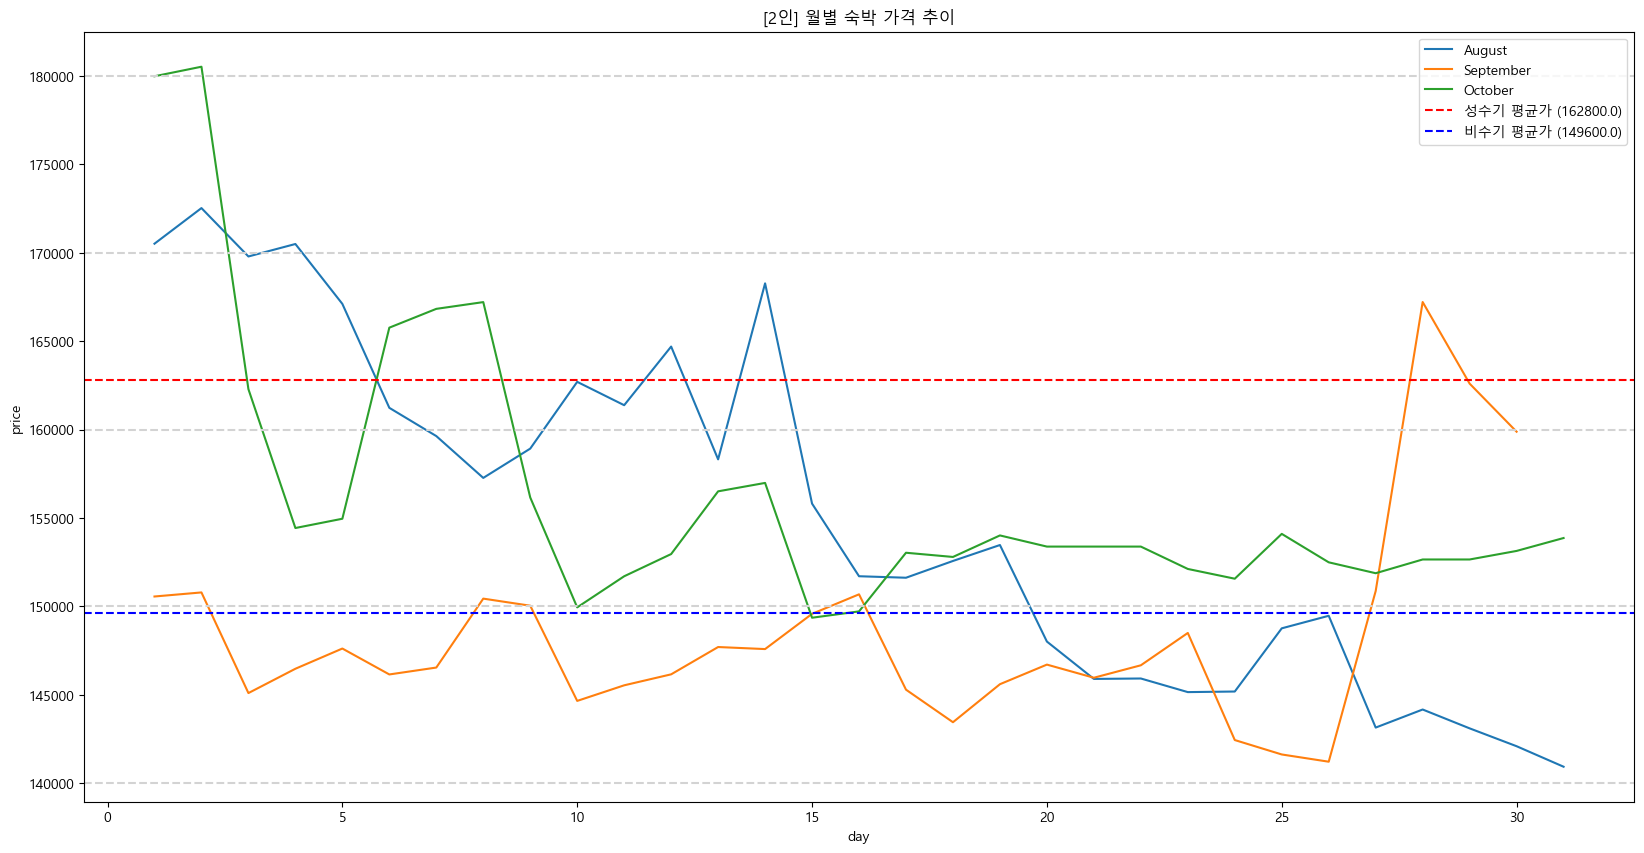

In [117]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axes = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='day', y='price', hue='month', data=df_2p, ci=None).set_title('[2인] 월별 숙박 가격 추이')
plt.axhline(y=140000, color='lightgray', linestyle='--')
plt.axhline(y=150000, color='lightgray', linestyle='--')
plt.axhline(y=160000, color='lightgray', linestyle='--')
plt.axhline(y=170000, color='lightgray', linestyle='--')
plt.axhline(y=180000, color='lightgray', linestyle='--')

plt.axhline(y=peak_2p, color='red', linestyle='--', label=f'성수기 평균가 ({peak_2p.round(-2)})')  # 성수기
plt.axhline(y=not_peak_2p, color='blue', linestyle='--', label=f'비수기 평균가 ({not_peak_2p.round(-2)})')  # 비수기
plt.legend()

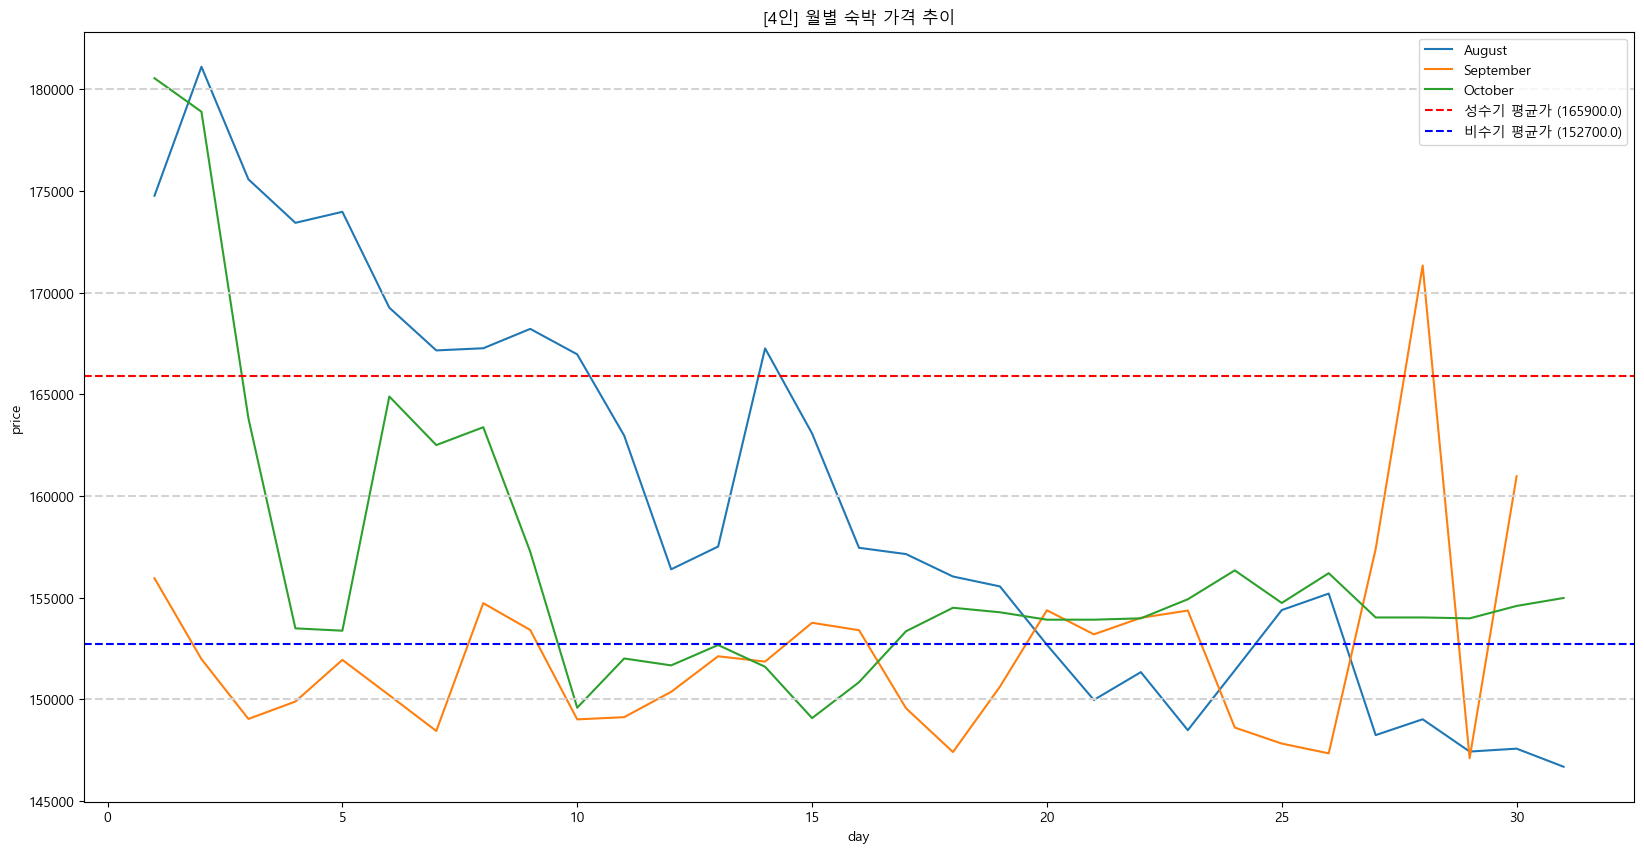

In [118]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axes = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='day', y='price', hue='month', data=df_4p, ci=None).set_title('[4인] 월별 숙박 가격 추이')
plt.axhline(y=150000, color='lightgray', linestyle='--')
plt.axhline(y=160000, color='lightgray', linestyle='--')
plt.axhline(y=170000, color='lightgray', linestyle='--')
plt.axhline(y=180000, color='lightgray', linestyle='--')

plt.axhline(y=peak_4p, color='red', linestyle='--', label=f'성수기 평균가 ({peak_4p.round(-2)})')  # 성수기
plt.axhline(y=not_peak_4p, color='blue', linestyle='--', label=f'비수기 평균가 ({not_peak_4p.round(-2)})')  # 비수기
plt.legend()

In [119]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

colors = ['lightpink', 'lightgreen', 'skyblue']

fig, axes = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='date', y='price', data=df_2p, hue='month', ci=None, palette=colors).set_title('[2인] 숙박 가격 추이')
plt.axvline(x='2023-08-17', color='lightgray', linestyle='--', label='성수기(여름휴가 ~8/16)')  # 성수기 (여름휴가 ~8/16)

plt.axhline(y=peak_2p, color='red', linestyle='--', label=f'성수기 평균가 ({peak_2p.round(-2)})')  # 성수기
plt.axhline(y=not_peak_2p, color='blue', linestyle='--', label=f'비수기 평균가 ({not_peak_2p.round(-2)})')  # 비수기
plt.legend()

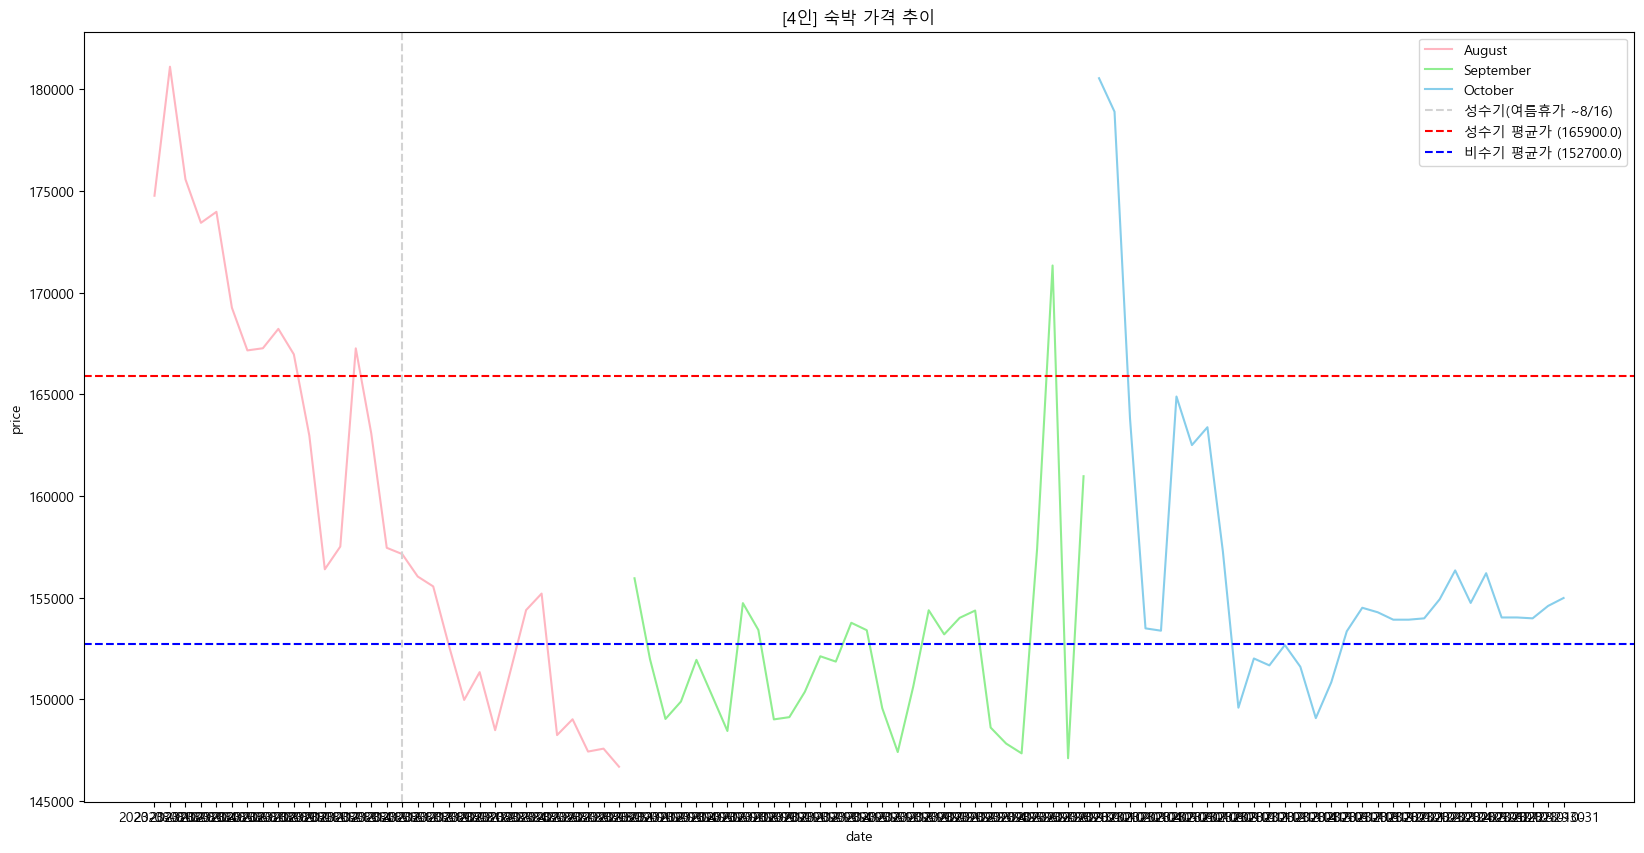

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

colors = ['lightpink', 'lightgreen', 'skyblue']

fig, axes = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='date', y='price', data=df_4p, hue='month', ci=None, palette=colors).set_title('[4인] 숙박 가격 추이')
plt.axvline(x='2023-08-17', color='lightgray', linestyle='--', label='성수기(여름휴가 ~8/16)')  # 성수기 (여름휴가 ~8/16)

plt.axhline(y=peak_4p, color='red', linestyle='--', label=f'성수기 평균가 ({peak_4p.round(-2)})')  # 성수기
plt.axhline(y=not_peak_4p, color='blue', linestyle='--', label=f'비수기 평균가 ({not_peak_4p.round(-2)})')  # 비수기
plt.legend()

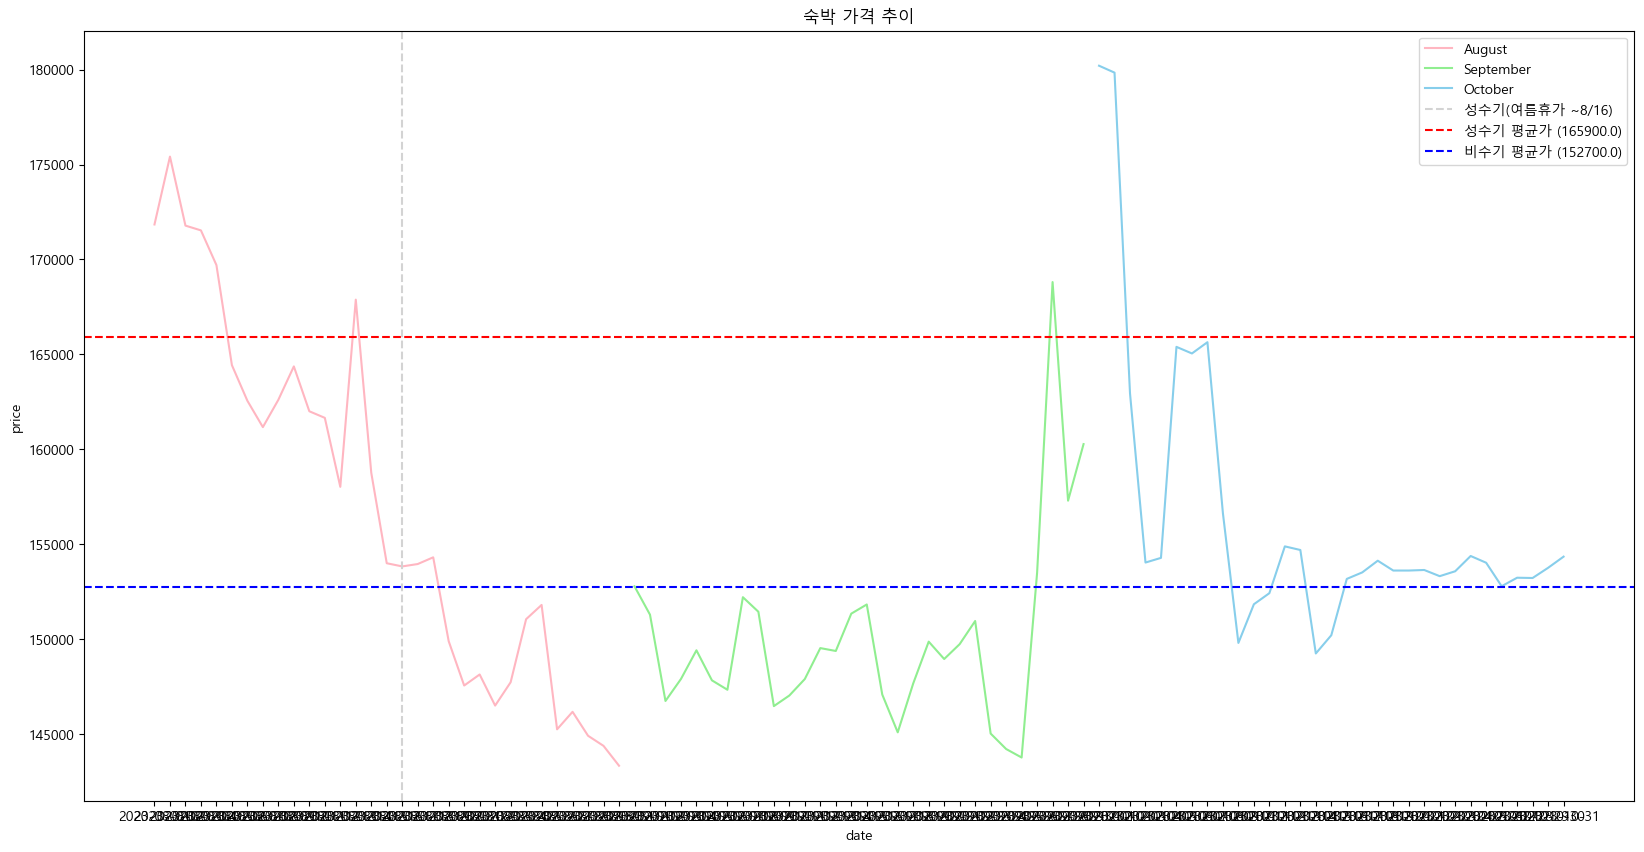

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

colors = ['lightpink', 'lightgreen', 'skyblue']

fig, axes = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='date', y='price', data=df_, hue='month', ci=None, palette=colors).set_title('숙박 가격 추이')
plt.axvline(x='2023-08-17', color='lightgray', linestyle='--', label='성수기(여름휴가 ~8/16)')  # 성수기 (여름휴가 ~8/16)

plt.axhline(y=peak_4p, color='red', linestyle='--', label=f'성수기 평균가 ({peak_4p.round(-2)})')  # 성수기
plt.axhline(y=not_peak_4p, color='blue', linestyle='--', label=f'비수기 평균가 ({not_peak_4p.round(-2)})')  # 비수기
plt.legend()

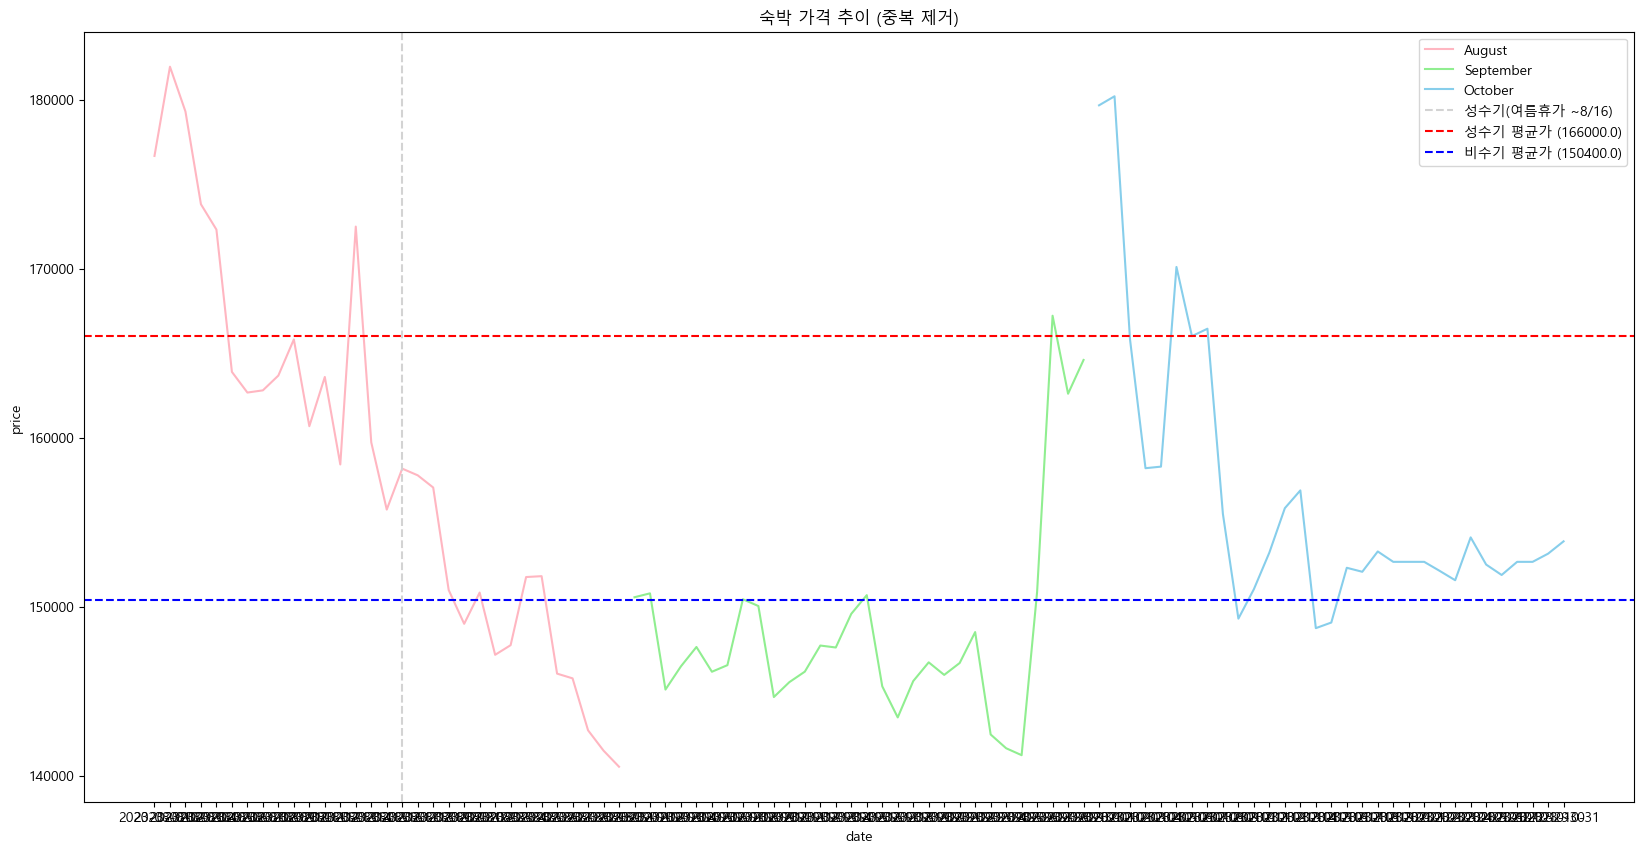

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

colors = ['lightpink', 'lightgreen', 'skyblue']

fig, axes = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='date', y='price', data=df_removed, hue='month', ci=None, palette=colors).set_title('숙박 가격 추이 (중복 제거)')
plt.axvline(x='2023-08-17', color='lightgray', linestyle='--', label='성수기(여름휴가 ~8/16)')  # 성수기 (여름휴가 ~8/16)

plt.axhline(y=peak_removed, color='red', linestyle='--', label=f'성수기 평균가 ({peak_removed.round(-2)})')  # 성수기
plt.axhline(y=not_peak_removed, color='blue', linestyle='--', label=f'비수기 평균가 ({not_peak_removed.round(-2)})')  # 비수기
plt.legend()

In [ ]:
# csv 파일 변환 >> 최종 모델링에서 사용 예정 데이터
df_removed.to_csv("hotel_EDA_final.csv", index=False, encoding="utf-8-sig", mode="w")